# Question 2

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
import keras
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()


In [48]:
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)


X_train shape: (60000, 28, 28) y_train shape: (60000,)


We modify the data in a way that can be inputed to the feed forward neural network

In [49]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


**Vanilla/ Baseline Model**

We have used the trial and error method for the baseline model and iterated through multiple values.We change the node sizes of the two layers preceeding the output layer and also the number of epochs. We finally affix 32 nodes for both the hidden layers and also have 10 epochs. The validation set accuracy is at 87%.



**All models are set to default batch size of 32**

In [0]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim = 784))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer= "adam", loss="categorical_crossentropy", metrics=['accuracy'])



In [51]:
history = model.fit(X_train, y_train, epochs=10, validation_split = 0.16666)
#Split as 0.16666 to enable splitting into 50,000 and 10,000 

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 7s 139us/step - loss: 0.5701 - acc: 0.7999 - val_loss: 0.4580 - val_acc: 0.8356
Epoch 2/10
50000/50000 [==============================] - 6s 118us/step - loss: 0.4107 - acc: 0.8544 - val_loss: 0.4223 - val_acc: 0.8498
Epoch 3/10
50000/50000 [==============================] - 5s 108us/step - loss: 0.3711 - acc: 0.8651 - val_loss: 0.3896 - val_acc: 0.8603
Epoch 4/10
50000/50000 [==============================] - 5s 108us/step - loss: 0.3505 - acc: 0.8710 - val_loss: 0.3627 - val_acc: 0.8677
Epoch 5/10
50000/50000 [==============================] - 5s 109us/step - loss: 0.3310 - acc: 0.8775 - val_loss: 0.3820 - val_acc: 0.8646
Epoch 6/10
50000/50000 [==============================] - 5s 108us/step - loss: 0.3192 - acc: 0.8821 - val_loss: 0.3498 - val_acc: 0.8768
Epoch 7/10
50000/50000 [==============================] - 5s 109us/step - loss: 0.3087 - acc: 0.8866 - val_loss: 0.3391 - 

Text(0, 0.5, 'loss')

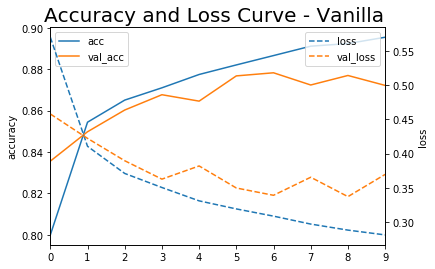

In [52]:
df = pd.DataFrame(history.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.title("Accuracy and Loss Curve - Vanilla ",fontsize=20 )

plt.ylabel("loss")

**We plot the learning curve**

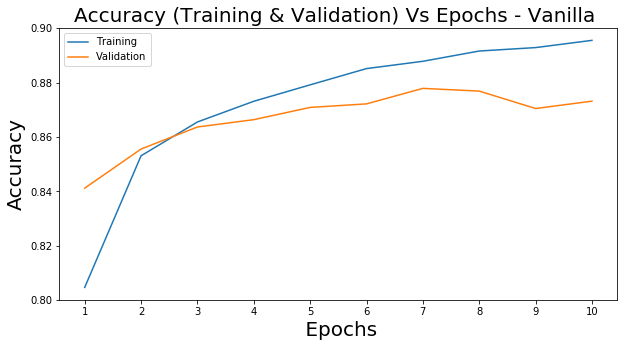

In [44]:
fig = plt.figure(figsize=(10,5))
plt.plot(list(range(1,11)), df['acc'], label='Training')
plt.plot(list(range(1,11)), df['val_acc'],label='Validation')
plt.xticks(list(range(1,11)))
plt.xlabel(" Epochs",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.title("Accuracy (Training & Validation) Vs Epochs - Vanilla ",fontsize=20 )
plt.legend(loc='best')
plt.show()

**Model Without and With Dropout**

In order to understand the effect of a model with Dropout regularization, we first have a model without regularization. We are increasing the number of layers as dropout's true effect is observed when it is used as a regularization technique.

In [0]:
from keras.layers import Dropout

Here, we add two additional layers when compared to baseline model and also increase number of nodes. Our objective first is to evaluate how this model performs without dropout.

In [0]:
model_no_dropout = Sequential()

model_no_dropout.add(Dense(128, activation='relu', input_dim = 784))

model_no_dropout.add(Dense(128, activation='relu'))

model_no_dropout.add(Dense(128, activation='relu'))

model_no_dropout.add(Dense(128, activation='relu'))

model_no_dropout.add(Dense(128, activation='relu'))

model_no_dropout.add(Dense(128, activation='relu'))


model_no_dropout.add(Dense(10, activation='softmax'))
model_no_dropout.compile(optimizer= "adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [58]:
#history_dropout = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))
history_no_dropout = model_no_dropout.fit(X_train, y_train, epochs=20, validation_split = 0.16666)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 9s 174us/step - loss: 0.5450 - acc: 0.8021 - val_loss: 0.4988 - val_acc: 0.8200
Epoch 2/20
50000/50000 [==============================] - 8s 151us/step - loss: 0.3976 - acc: 0.8545 - val_loss: 0.3815 - val_acc: 0.8595
Epoch 3/20
50000/50000 [==============================] - 8s 151us/step - loss: 0.3563 - acc: 0.8699 - val_loss: 0.3713 - val_acc: 0.8676
Epoch 4/20
50000/50000 [==============================] - 7s 149us/step - loss: 0.3334 - acc: 0.8787 - val_loss: 0.3500 - val_acc: 0.8725
Epoch 5/20
50000/50000 [==============================] - 7s 149us/step - loss: 0.3178 - acc: 0.8841 - val_loss: 0.3553 - val_acc: 0.8735
Epoch 6/20
50000/50000 [==============================] - 8s 152us/step - loss: 0.3030 - acc: 0.8888 - val_loss: 0.3498 - val_acc: 0.8729
Epoch 7/20
50000/50000 [==============================] - 8s 151us/step - loss: 0.2892 - acc: 0.8949 - val_loss: 0.3596 - 

Text(0, 0.5, 'loss')

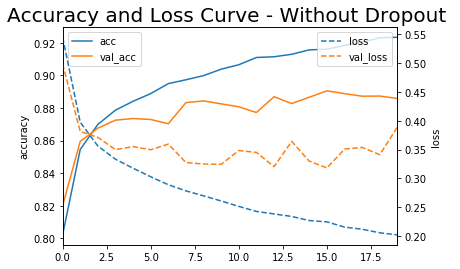

In [59]:
df = pd.DataFrame(history_no_dropout.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.title("Accuracy and Loss Curve - Without Dropout ",fontsize=20 )

plt.ylabel("loss")

Visualising the learning curve for a model without dropout. The model continuously outperforms in training than in validation which might be an indicator of overfitting. Also, the training accuracy here obtained are higher than the vanilla model while the validation set shows similar accuracy which might also be an indicator of overfitting.

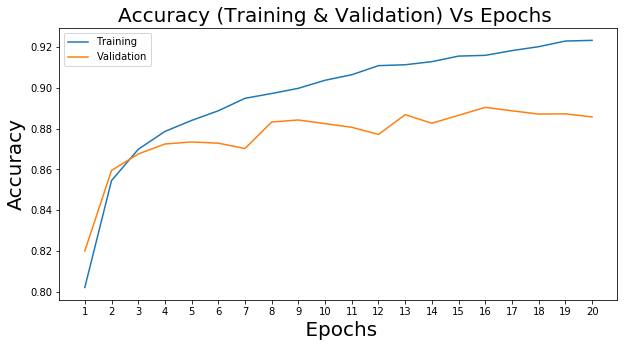

In [60]:
fig = plt.figure(figsize=(10,5))
plt.plot(list(range(1,21)), df['acc'], label='Training')
plt.plot(list(range(1,21)), df['val_acc'],label='Validation')
plt.xticks(list(range(1,21)))
plt.xlabel(" Epochs",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.title("Accuracy (Training & Validation) Vs Epochs ",fontsize=20 )
plt.legend(loc='best')
plt.show()

**Adding Dropout**

In [0]:
model_dropout = Sequential()

model_dropout.add(Dense(128, activation='relu', input_dim = 784))
model_dropout.add(Dropout(0.25))

model_dropout.add(Dense(128, activation='relu'))
model_dropout.add(Dropout(0.25))

model_dropout.add(Dense(128, activation='relu'))
model_dropout.add(Dropout(0.25))

model_dropout.add(Dense(128, activation='relu'))
model_dropout.add(Dropout(0.25))

model_dropout.add(Dense(128, activation='relu'))
model_dropout.add(Dropout(0.25))

model_dropout.add(Dense(128, activation='relu'))
model_dropout.add(Dropout(0.25))


model_dropout.add(Dense(10, activation='softmax'))
model_dropout.compile(optimizer= "adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [62]:
history_dropout = model_dropout.fit(X_train, y_train, batch_size = 50, epochs=20, validation_split = 0.16666)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 8s 151us/step - loss: 0.8508 - acc: 0.6747 - val_loss: 0.5103 - val_acc: 0.8040
Epoch 2/20
50000/50000 [==============================] - 6s 110us/step - loss: 0.5576 - acc: 0.8012 - val_loss: 0.4308 - val_acc: 0.8441
Epoch 3/20
50000/50000 [==============================] - 6s 112us/step - loss: 0.5057 - acc: 0.8221 - val_loss: 0.4108 - val_acc: 0.8534
Epoch 4/20
50000/50000 [==============================] - 6s 111us/step - loss: 0.4767 - acc: 0.8335 - val_loss: 0.4188 - val_acc: 0.8516
Epoch 5/20
50000/50000 [==============================] - 6s 110us/step - loss: 0.4587 - acc: 0.8405 - val_loss: 0.4069 - val_acc: 0.8501
Epoch 6/20
50000/50000 [==============================] - 5s 110us/step - loss: 0.4385 - acc: 0.8479 - val_loss: 0.3847 - val_acc: 0.8600
Epoch 7/20
50000/50000 [==============================] - 6s 111us/step - loss: 0.4335 - acc: 0.8490 - val_loss: 0.3971 - 

**When training, a percentage of the features are set to zero (30% in this case). When testing, all features are used. So, at times the model at test (or validation) is more robust and shows higher accuracy than when it is given test data set. As a general trend we see that, training accuracies decrease when we apply dropout and the training and validation curves are closer indicating that we are able to curtail overfitting **

Text(0, 0.5, 'loss')

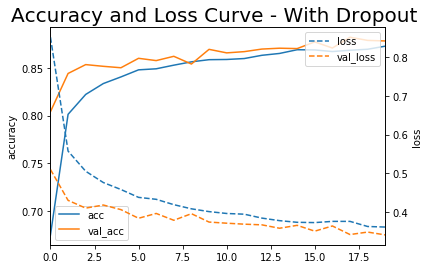

In [63]:
df = pd.DataFrame(history_dropout.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.title("Accuracy and Loss Curve - With Dropout ",fontsize=20 )
plt.ylabel("loss")

**Visualising the learning curves for a model chosen with dropout**

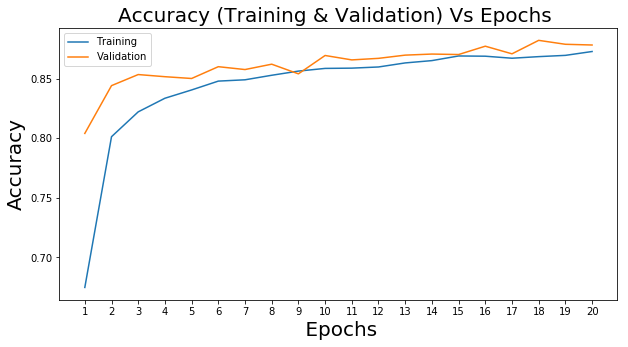

In [64]:
fig = plt.figure(figsize=(10,5))
plt.plot(list(range(1,21)), df['acc'], label='Training')
plt.plot(list(range(1,21)), df['val_acc'],label='Validation')
plt.xticks(list(range(1,21)))
plt.xlabel(" Epochs",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.title("Accuracy (Training & Validation) Vs Epochs ",fontsize=20 )
plt.legend(loc='best')
plt.show()

**Running Batch Normalization and residual connection** - We first have to run a deep network model wih batch normalization and residual connection to understand its impact. Our understanding is that these factors help us while work with nets with more layers than what we are currently using (owing to time constraints), but our goal here is to decode the intuition behind using these

In [0]:
from keras.layers import Input, Dense, Add
from keras.models import Model
from keras.layers import BatchNormalization

In [0]:
inputs = Input (shape = (784,))

x1 = Dense (128, activation = 'relu')(inputs)

x2 = Dense(128, activation='relu')(x1)

x3 = Dense(128, activation='relu')(x2)

x4 = Dense(128, activation='relu')(x3)

x5 = Dense(128, activation='relu')(x4)

x6 = Dense(128, activation='relu')(x5)

x7 = Dense(128, activation='relu')(x6)

x8 = Dense(128, activation='relu')(x7)

x9 = Dense(128, activation='relu')(x8)


predictions = Dense(10, activation='softmax')(x9)

model_nobnrc = Model(inputs=inputs, outputs=predictions)

model_nobnrc.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Even with a network with more layers and nodes, we are just able to meet the performance of the vanilla model indicating that the model has a difficulty 'learning'. So we use batch normalization, a process which, at a theoretical level, allows each layer of a learn better by itself and residual connections, a mechanism that can help deep networks learn better

In [67]:
history_nobnrc = model.fit(X_train, y_train, epochs=20, validation_split = 0.16666)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 131us/step - loss: 0.2759 - acc: 0.8977 - val_loss: 0.3561 - val_acc: 0.8750
Epoch 2/20
50000/50000 [==============================] - 6s 113us/step - loss: 0.2691 - acc: 0.9001 - val_loss: 0.3498 - val_acc: 0.8780
Epoch 3/20
50000/50000 [==============================] - 6s 112us/step - loss: 0.2648 - acc: 0.9009 - val_loss: 0.3594 - val_acc: 0.8755
Epoch 4/20
50000/50000 [==============================] - 6s 121us/step - loss: 0.2567 - acc: 0.9041 - val_loss: 0.3433 - val_acc: 0.8790
Epoch 5/20
50000/50000 [==============================] - 6s 126us/step - loss: 0.2529 - acc: 0.9050 - val_loss: 0.3433 - val_acc: 0.8805
Epoch 6/20
50000/50000 [==============================] - 6s 113us/step - loss: 0.2498 - acc: 0.9064 - val_loss: 0.3479 - val_acc: 0.8787
Epoch 7/20
50000/50000 [==============================] - 6s 114us/step - loss: 0.2462 - acc: 0.9078 - val_loss: 0.3400 - 

Text(0, 0.5, 'loss')

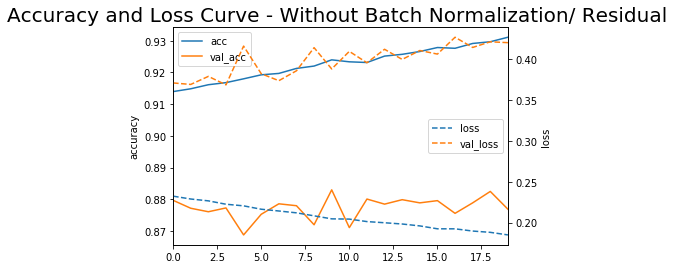

In [29]:
df = pd.DataFrame(history_nobnrc.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.title("Accuracy and Loss Curve - Without Batch Normalization/ Residual ",fontsize=20 )
plt.ylabel("loss")

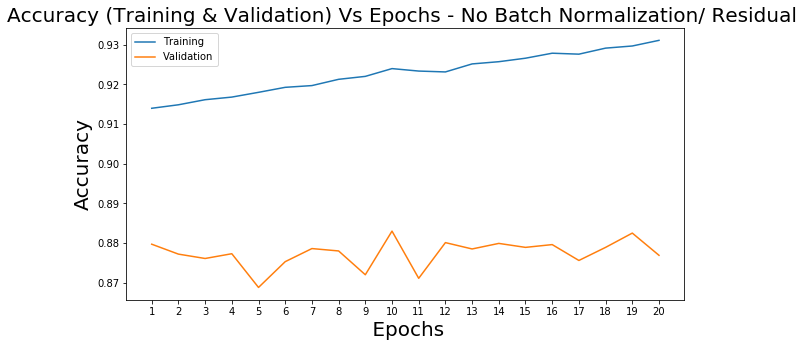

In [30]:
fig = plt.figure(figsize=(10,5))
plt.plot(list(range(1,21)), df['acc'], label='Training')
plt.plot(list(range(1,21)), df['val_acc'],label='Validation')
plt.xticks(list(range(1,21)))
plt.xlabel(" Epochs",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.title("Accuracy (Training & Validation) Vs Epochs - No Batch Normalization/ Residual ",fontsize=20 )
plt.legend(loc='best')
plt.show()

**Running a model with Batch normalization and residual connection**

In [0]:
inputs = Input (shape = (784,))

x1 = Dense (128, activation = 'relu')(inputs)
x2 = BatchNormalization()(x1)

x3 = Dense(128, activation='relu')(x2)
x4 = BatchNormalization()(x3)

x5 = Dense(128, activation='relu')(x4)
x6 = BatchNormalization()(x5)

x7 = keras.layers.Add()([x3,x6])

x8 = Dense(128, activation='relu')(x7)
x9 = BatchNormalization()(x8)

x10 = Dense(128, activation='relu')(x9)
x11 = BatchNormalization()(x10)

x12 = keras.layers.Add()([x8,x11])

x13 = Dense(128, activation='relu')(x12)
x14 = BatchNormalization()(x13)

x15 = Dense(128, activation='relu')(x14)
x16 = BatchNormalization()(x15)

x17 = Dense(128, activation='relu')(x16)
x18 = BatchNormalization()(x17)

x19 = keras.layers.Add()([x15,x18])

x20 = Dense(128, activation='relu')(x19)
x21 = BatchNormalization()(x20)


predictions = Dense(10, activation='softmax')(x21)

model = Model(inputs=inputs, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [69]:
history_bnrc = model.fit(X_train, y_train, epochs=20, validation_split = 0.16666)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 30s 607us/step - loss: 0.6162 - acc: 0.7840 - val_loss: 0.4979 - val_acc: 0.8176
Epoch 2/20
50000/50000 [==============================] - 28s 551us/step - loss: 0.4557 - acc: 0.8348 - val_loss: 0.4643 - val_acc: 0.8489
Epoch 3/20
50000/50000 [==============================] - 26s 518us/step - loss: 0.4187 - acc: 0.8492 - val_loss: 0.3837 - val_acc: 0.8614
Epoch 4/20
50000/50000 [==============================] - 27s 542us/step - loss: 0.3900 - acc: 0.8581 - val_loss: 0.3908 - val_acc: 0.8468
Epoch 5/20
50000/50000 [==============================] - 26s 516us/step - loss: 0.3663 - acc: 0.8660 - val_loss: 0.3595 - val_acc: 0.8679
Epoch 6/20
50000/50000 [==============================] - 27s 538us/step - loss: 0.3444 - acc: 0.8742 - val_loss: 0.3728 - val_acc: 0.8648
Epoch 7/20
50000/50000 [==============================] - 27s 547us/step - loss: 0.3320 - acc: 0.8789 - val_loss: 0.

Text(0, 0.5, 'loss')

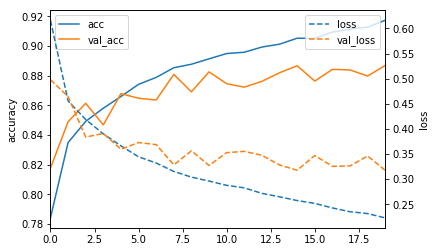

In [70]:
df = pd.DataFrame(history_bnrc.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In the case of running this model using Batch Normalization & Residual, we find a better learning pattern where the validation set learning follows the training set. 

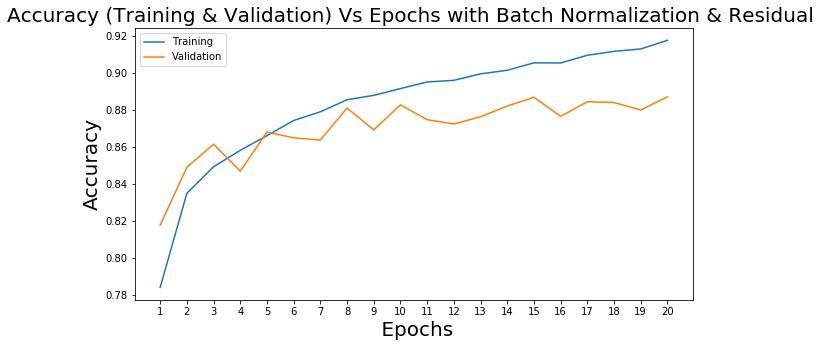

In [71]:
fig = plt.figure(figsize=(10,5))
plt.plot(list(range(1,21)), df['acc'], label='Training')
plt.plot(list(range(1,21)), df['val_acc'],label='Validation')
plt.xticks(list(range(1,21)))
plt.xlabel(" Epochs",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.title("Accuracy (Training & Validation) Vs Epochs with Batch Normalization & Residual ",fontsize=20 )
plt.legend(loc='best')
plt.show()